In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from apyori import apriori

In [2]:
#1)	ID пользователя (анонимно) 
#2)	Идентификатор потока 
#3)	Имя пользователя стримера 
#4)	Время начала 
#5)	Время конца
data = pd.read_csv('100k_a.csv', sep=',' , names=["user_id", "streamer_id","streamer_user ", "time_start", "time_stop"])
data

,user_id,streamer_id,streamer_user,time_start,time_stop
0,1,33842865744,mithrain,154,156
1,1,33846768288,alptv,166,169
2,1,33886469056,mithrain,587,588
3,1,33887624992,wtcn,589,591
4,1,33890145056,jrokezftw,591,594
...,...,...,...,...,...
3051728,100000,34167930576,mckytv,3582,3583
3051729,100000,34168288656,natehill,3582,3583
3051730,100000,34169594512,fortnite,3582,3584
3051731,100000,34180223072,highdistortion,3709,3711


In [3]:
time = data['time_stop'] - data['time_start']
data['time'] = time
data

,user_id,streamer_id,streamer_user,time_start,time_stop,time
0,1,33842865744,mithrain,154,156,2
1,1,33846768288,alptv,166,169,3
2,1,33886469056,mithrain,587,588,1
3,1,33887624992,wtcn,589,591,2
4,1,33890145056,jrokezftw,591,594,3
...,...,...,...,...,...,...
3051728,100000,34167930576,mckytv,3582,3583,1
3051729,100000,34168288656,natehill,3582,3583,1
3051730,100000,34169594512,fortnite,3582,3584,2
3051731,100000,34180223072,highdistortion,3709,3711,2


In [4]:
data["streamer_id"].nunique()


739991

In [5]:
data.columns

Index(['user_id', 'streamer_id', 'streamer_user ', 'time_start', 'time_stop',
       'time'],
      dtype='object')

In [6]:
df = data[data.user_id <  6] #сократила датасет 
df

,user_id,streamer_id,streamer_user,time_start,time_stop,time
0,1,33842865744,mithrain,154,156,2
1,1,33846768288,alptv,166,169,3
2,1,33886469056,mithrain,587,588,1
3,1,33887624992,wtcn,589,591,2
4,1,33890145056,jrokezftw,591,594,3
...,...,...,...,...,...,...
164,5,34139569424,nick28t,3286,3287,1
165,5,34165772528,nick28t,3595,3596,1
166,5,34376956720,nick28t,5713,5715,2
167,5,34402291008,nick28t,5999,6000,1


In [7]:
df.dtypes

user_id            int64
streamer_id        int64
streamer_user     object
time_start         int64
time_stop          int64
time               int64
dtype: object

In [8]:
df["streamer_id"]

0      33842865744
1      33846768288
2      33886469056
3      33887624992
4      33890145056
          ...     
164    34139569424
165    34165772528
166    34376956720
167    34402291008
168    34403913104
Name: streamer_id, Length: 169, dtype: int64

In [33]:
df

,user_id,streamer_id,streamer_user,time_start,time_stop,time
0,1,33842865744,mithrain,154,156,2
1,1,33846768288,alptv,166,169,3
2,1,33886469056,mithrain,587,588,1
3,1,33887624992,wtcn,589,591,2
4,1,33890145056,jrokezftw,591,594,3
...,...,...,...,...,...,...
164,5,34139569424,nick28t,3286,3287,1
165,5,34165772528,nick28t,3595,3596,1
166,5,34376956720,nick28t,5713,5715,2
167,5,34402291008,nick28t,5999,6000,1


In [40]:

df["streamer_id"].apply(lambda x: str(x))


0      33842865744
1      33846768288
2      33886469056
3      33887624992
4      33890145056
          ...     
164    34139569424
165    34165772528
166    34376956720
167    34402291008
168    34403913104
Name: streamer_id, Length: 169, dtype: object

In [41]:
df_times = df.pivot_table(values='time', columns = ["streamer_id"], index = "user_id" , aggfunc=np.sum)


In [42]:
df_times[np.isnan(df_times)] = 0
df_times[df_times>0] = 1
df_times.head()

streamer_id,33827012304,33835492656,33838908736,33840645856,33842237568,33842865744,33843053296,33843977280,33846768288,33848559952,...,34376626624,34376956720,34378397120,34391109664,34395247264,34399506000,34401303568,34402291008,34403913104,34405646144
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [43]:
def stream_list(df_times):
    list_external=[]
    for i in range(df_times.shape[0]):
        list_internal = []
        data = df_times.iloc[i]
        index = data[data>0]
        for j in index.index:
            list_external.append(j)
        list_external.append(list_internal)
    return list_external


In [44]:
stream  = stream_list(df_times[:200])
stream[1]

'33846768288'

In [45]:
from pymining import itemmining, assocrules, perftesting
stream_input =itemmining.get_relim_input(stream)
item_sets = itemmining.relim(stream_input, min_support = 1 )

In [46]:
rules = assocrules.mine_assoc_rules(item_sets, min_support = 3 , min_confidence = 0.3)
rules

[(frozenset({'0', '2', '3', '4', '5', '6', '7'}), frozenset({'1'}), 5, 0.5),
 (frozenset({'0', '2', '3', '4', '5', '7'}),
  frozenset({'1', '6'}),
  5,
  0.35714285714285715),
 (frozenset({'0', '2', '4', '5', '7'}),
  frozenset({'1', '3', '6'}),
  5,
  0.35714285714285715),
 (frozenset({'0', '2', '3', '4', '6', '7'}), frozenset({'1', '5'}), 5, 0.3125),
 (frozenset({'0', '2', '4', '6', '7'}), frozenset({'1', '3', '5'}), 5, 0.3125),
 (frozenset({'0', '2', '6', '7'}), frozenset({'1', '3', '4', '5'}), 5, 0.3125),
 (frozenset({'0', '2', '3', '6', '7'}), frozenset({'1', '4', '5'}), 5, 0.3125),
 (frozenset({'0', '2', '4', '5', '6', '7'}), frozenset({'1', '3'}), 5, 0.5),
 (frozenset({'0', '2', '5', '6', '7'}), frozenset({'1', '3', '4'}), 5, 0.5),
 (frozenset({'0', '2', '3', '5', '6', '7'}), frozenset({'1', '4'}), 5, 0.5),
 (frozenset({'0', '1', '2', '3', '4', '5', '7'}),
  frozenset({'6'}),
  5,
  0.7142857142857143),
 (frozenset({'1', '2', '3', '4', '5', '7'}), frozenset({'0', '6'}), 5, 0.312

In [47]:
def write_rules(rule):
    mass = []
    for k in rule:
        basis =''
        for iterator in iter(k[0]):
            basis=basis+iterator+'-'
        conclusion=''
        for iterator in iter(k[1]):
            conclusion=conclusion+iterator+'-'
        mass.append([basis,conclusion,str(k[2]) , str(k[3])])
    return mass     

In [48]:
rul1 = write_rules(rules)
df_rules = pd.DataFrame(rul1, columns = ('Посыл', 'Следствие', 'Поддержка', 'Достоверность'))
df_rules

,Посыл,Следствие,Поддержка,Достоверность
0,6-0-7-5-3-4-2-,1-,5,0.5
1,3-4-2-0-7-5-,1-6-,5,0.35714285714285715
2,4-2-0-7-5-,1-6-3-,5,0.35714285714285715
3,3-4-6-2-0-7-,1-5-,5,0.3125
4,4-6-2-0-7-,1-3-5-,5,0.3125
...,...,...,...,...
11884,4-,9-,95,0.6375838926174496
11885,9-,3-,115,1.0
11886,3-,9-,115,0.6804733727810651
11887,4-,3-,149,1.0


In [49]:
writer=pd.ExcelWriter('rule.xlsx')
df_rules.to_excel(writer, 'AR')
writer.save()

In [50]:
data = data.drop(columns="time_start") 

In [51]:
data = data.drop(columns="time_stop")


In [52]:
data.columns

Index(['user_id', 'streamer_id', 'streamer_user ', 'time'], dtype='object')

In [53]:
 data["streamer_user "].astype('string')

0                mithrain
1                   alptv
2                mithrain
3                    wtcn
4               jrokezftw
                ...      
3051728            mckytv
3051729          natehill
3051730          fortnite
3051731    highdistortion
3051732          symfuhny
Name: streamer_user , Length: 3051733, dtype: string

In [54]:
import sqlite3


con = sqlite3.connect('str_database') 
cur = con.cursor()


cur.execute('''CREATE TABLE IF NOT EXISTS STREAM
          ([user_id] INTEGER , 
           [streamer_id] INTEGER, 
           [streamer_user] varchar(255), 
           [time] INTEGER)''')

In [55]:

df = pd.DataFrame(data, columns= ['user_id','streamer_id','streamer_user ','time'])
for row in df.itertuples(index = False):
    cur.execute('''
                INSERT INTO STREAM (user_id,streamer_id,streamer_user, time )
                 VALUES (?, ?, ?, ?)
                 ''', row
                  )
con.commit()

In [56]:
pd.read_sql("SELECT * FROM STREAM  LIMIT 20", con)

,user_id,streamer_id,streamer_user,time
0,1,33842865744,mithrain,2
1,1,33846768288,alptv,3
2,1,33886469056,mithrain,1
3,1,33887624992,wtcn,2
4,1,33890145056,jrokezftw,3
5,1,33903958784,berkriptepe,3
6,1,33929318864,kendinemuzisyen,15
7,1,33942837056,wtcn,2
8,1,33955351648,kendinemuzisyen,2
9,1,34060922080,mithrain,1


In [59]:
sql_query = pd.read_sql('''SELECT * FROM STREAM''', con)

In [60]:
df = pd.DataFrame(sql_query,  columns= ['user_id','streamer_id','streamer_user','time'])
df

,user_id,streamer_id,streamer_user,time
0,1,33842865744,mithrain,2
1,1,33846768288,alptv,3
2,1,33886469056,mithrain,1
3,1,33887624992,wtcn,2
4,1,33890145056,jrokezftw,3
...,...,...,...,...
6103461,100000,34167930576,mckytv,1
6103462,100000,34168288656,natehill,1
6103463,100000,34169594512,fortnite,2
6103464,100000,34180223072,highdistortion,2


In [61]:
df.isnull().sum()

user_id          0
streamer_id      0
streamer_user    0
time             0
dtype: int64

In [62]:
df.describe()

,user_id,streamer_id,time
count,6.103466e+06,6.103466e+06,6.103466e+06
mean,5.032313e+04,3.413002e+10,3.142054e+00
std,2.889476e+04,1.682242e+08,4.257966e+00
min,1.000000e+00,3.380153e+10,1.000000e+00
25%,2.528400e+04,3.398884e+10,1.000000e+00
50%,5.029900e+04,3.413069e+10,1.000000e+00
75%,7.545200e+04,3.427399e+10,3.000000e+00
max,1.000000e+05,3.441642e+10,9.700000e+01


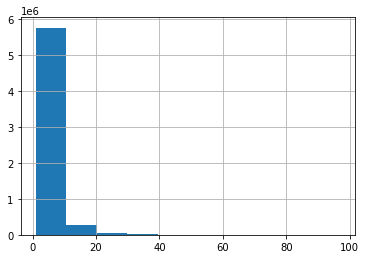

In [63]:
df['time'].hist();

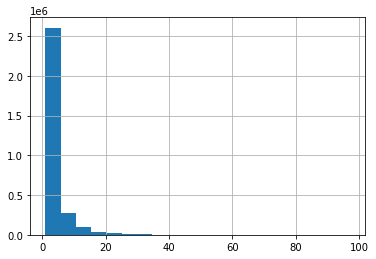

In [6]:
df['time'].hist(bins=20);

In [ ]:
plt.figure(figsize=(15, 8)) # увеличим размер картинки
sns.countplot(y='age', hue='cardio', data=df);